https://www.kaggle.com/muhammete/week-24-homework-c

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor


# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Disabling warnings
import warnings
warnings.simplefilter("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/rain-dfd/mycsvfile.csv
/kaggle/input/heart-disease-uci/heart.csv


## READ DATA AND EXPLORING DATA

In [3]:
data=pd.read_csv("../input/rain-dfd/mycsvfile.csv")
df=data.copy()
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,0.6,20.0,7.3,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.4,25.1,0.0,4.0,8.0,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12.9,25.7,0.0,5.2,9.3,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9.2,28.0,0.0,4.4,10.7,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,6.0,1.7,41.0,7.0,20.0,82.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
data.sample(5)  #chose randon sample from row

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
38798,16.8,24.6,1.0,8.6,0.8,37.0,19.0,22.0,67.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82781,18.7,24.6,2.6,5.6,2.7,37.0,4.0,17.0,90.0,59.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
56897,0.0,12.9,0.2,1.6,5.6,31.0,11.0,13.0,91.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23837,6.4,19.1,0.2,1.0,5.5,19.0,0.0,9.0,73.0,58.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139642,15.3,34.0,0.0,8.4,10.6,48.0,26.0,19.0,24.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MinTemp             140787 non-null  float64
 1   MaxTemp             140787 non-null  float64
 2   Rainfall            140787 non-null  float64
 3   Evaporation         140787 non-null  float64
 4   Sunshine            140787 non-null  float64
 5   WindGustSpeed       140787 non-null  float64
 6   WindSpeed9am        140787 non-null  float64
 7   WindSpeed3pm        140787 non-null  float64
 8   Humidity9am         140787 non-null  float64
 9   Humidity3pm         140787 non-null  float64
 10  Pressure9am         140787 non-null  float64
 11  Pressure3pm         140787 non-null  float64
 12  Cloud9am            140787 non-null  float64
 13  Cloud3pm            140787 non-null  float64
 14  Temp9am             140787 non-null  float64
 15  Temp3pm             140787 non-nul

In [7]:
df.RainTomorrow_label.unique()

array([0., 1.])

In [8]:
df.isnull().sum()  

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

In [9]:
df["RainTomorrow_label"].value_counts()

0.0    109838
1.0     30949
Name: RainTomorrow_label, dtype: int64

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,...,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.205540,23.193379,2.310903,5.306846,7.395446,39.888697,13.939867,18.673400,69.136504,51.632686,...,0.045991,0.055985,0.062399,0.065176,0.062776,0.067385,0.061405,0.068430,0.056106,0.062094
std,6.373513,7.087636,8.079145,4.256484,3.853250,13.597664,8.820930,8.759251,19.160930,20.771776,...,0.209467,0.229894,0.241880,0.246838,0.242560,0.250689,0.240072,0.252483,0.230127,0.241327
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.800000,0.000000,2.400000,4.500000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.400000,8.200000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,7.200000,10.500000,48.000000,19.000000,24.000000,83.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,236.800000,86.200000,14.500000,130.000000,74.000000,83.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
MinTemp,1.000000,0.730595,0.106781,0.458283,0.074517,0.176139,0.174491,0.176577,-0.231890,0.004518,...,-0.073469,-0.068614,0.007172,0.070864,0.026201,0.002214,-0.051908,-0.086038,-0.055892,-0.073853
MaxTemp,0.730595,1.000000,-0.078675,0.546015,0.471292,0.060377,0.018462,0.045191,-0.514277,-0.514212,...,-0.030816,-0.029912,-0.035894,0.058239,0.005394,-0.061277,-0.057627,-0.093961,-0.043671,-0.078063
Rainfall,0.106781,-0.078675,1.000000,-0.032646,-0.227352,0.130710,0.084441,0.058188,0.230234,0.262432,...,-0.014352,-0.005550,0.027224,0.007560,0.008678,0.023317,0.009538,0.012073,0.005101,0.011616
Evaporation,0.458283,0.546015,-0.032646,1.000000,0.280005,0.222685,0.169736,0.154511,-0.446459,-0.357723,...,-0.051894,-0.040101,0.001922,0.038209,0.023817,0.075791,-0.011342,-0.048084,-0.037205,-0.025794
Sunshine,0.074517,0.471292,-0.227352,0.280005,1.000000,-0.032685,0.008038,0.041393,-0.496084,-0.635496,...,-0.036414,-0.017770,-0.032267,0.034882,0.000307,-0.064337,0.010602,-0.023993,-0.015473,-0.005948
WindGustSpeed,0.176139,0.060377,0.130710,0.222685,-0.032685,1.000000,0.599570,0.692965,-0.202131,-0.022186,...,0.009987,0.056660,0.014633,-0.030939,-0.013997,0.029232,0.002694,0.086264,0.081660,0.047393
WindSpeed9am,0.174491,0.018462,0.084441,0.169736,0.008038,0.599570,1.000000,0.518092,-0.275848,-0.034919,...,-0.028219,-0.013692,0.037154,0.027731,0.041429,-0.009153,-0.004415,0.030708,0.017608,0.004116
WindSpeed3pm,0.176577,0.045191,0.058188,0.154511,0.041393,0.692965,0.518092,1.000000,-0.137463,0.019645,...,-0.002850,0.027796,0.026321,-0.002165,0.006487,0.020979,-0.001748,0.054139,0.059755,0.025313
Humidity9am,-0.231890,-0.514277,0.230234,-0.446459,-0.496084,-0.202131,-0.275848,-0.137463,1.000000,0.671695,...,0.024431,0.011786,0.023925,-0.019171,-0.002373,0.054883,-0.006499,0.016139,0.006557,0.001026
Humidity3pm,0.004518,-0.514212,0.262432,-0.357723,-0.635496,-0.022186,-0.034919,0.019645,0.671695,1.000000,...,-0.002631,-0.013364,0.043981,-0.010033,0.007942,0.045178,-0.012317,0.001133,-0.012346,-0.007754


## SOME VISUALIZATION

### Count of disease and not desease

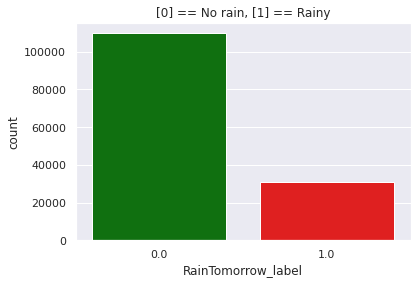

In [13]:
sns.countplot(df.RainTomorrow_label, palette=['green', 'red'])
plt.title("[0] == No rain, [1] == Rainy");

## Correlation matrix(heatmap)

(33.5, -0.5)

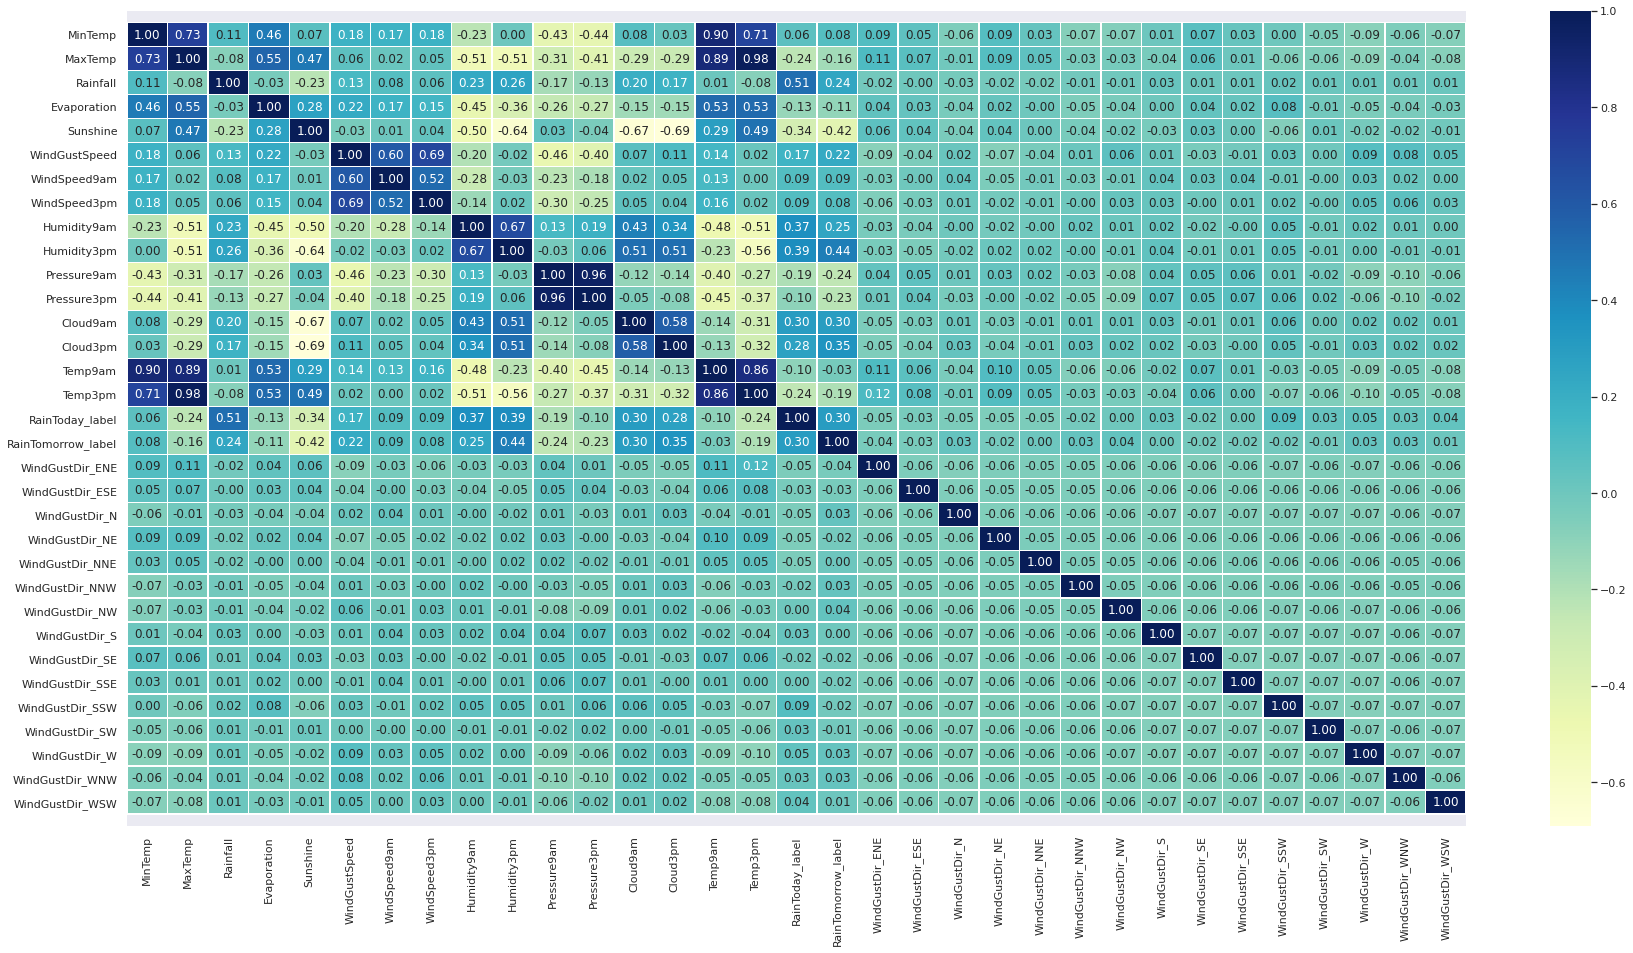

In [16]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## LETS NORMALIZE THE VARIABLES 

### Normalization

In [17]:
y = df.RainTomorrow_label.values
x_dat = df.drop(['RainTomorrow_label'], axis = 1)
x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

# LETS TRY CLASSIFICATIONS METHODS
* Now we've got our data split into training and test sets, it's time to build a machine learning model.

* We'll train it (find the patterns) on the training set.

* And we'll test it (use the patterns) on the test set.

* We're going to try  machine learning models:
   * 1)Logistic Regression
   * 2)K-Nearest Neighbours Classifier
   * 3)Support Vector machine
   * 4)Decision Tree Classifier
   * 5)Random Forest Classifier

## 1)LOGISTIC REGRESSION:
 * Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.
 * Lojistik regresyon, kümülatif lojistik dağılım olan bir lojistik fonksiyon kullanarak olasılıkları tahmin ederek kategorik bağımlı değişken (özellik) ile bir veya daha fazla bağımsız değişken (özellik) arasındaki ilişkiyi ölçer.

### A ) Train-test splitting

In [18]:
y=df.RainTomorrow_label.values
x_dat=df.drop(["RainTomorrow_label"],axis=1)

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### B ) Modeling of Logistic R. Method

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver = 'liblinear')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [21]:
lr #We can see what there is in lr(icinde hangi secenekler vargormek icin) 

#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   #intercept_scaling=1, l1_ratio=None, max_iter=100,
                  # multi_class='auto', n_jobs=None, penalty='l2',
                  # random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                  # warm_start=False)

LogisticRegression(solver='liblinear')

In [22]:
lr

LogisticRegression(solver='liblinear')

In [23]:
lr.intercept_  #sabit katsayi

array([-3.92572656])

In [24]:
lr.coef_   #degisken katsayilari

array([[ -0.7602224 ,   1.40769232,   2.45381445,  -3.49901358,
         -1.88451632,   6.17636361,  -0.68624868,  -1.85248357,
         -0.4265711 ,   5.55280673,   6.94536287, -10.33146918,
         -0.07165792,   0.74468754,   0.47074989,   0.72792114,
          0.51974871,  -0.10935608,  -0.11602062,   0.18933723,
         -0.21072228,  -0.08216529,   0.16750831,   0.17103012,
         -0.10211906,  -0.0487602 ,  -0.09601094,  -0.29216536,
          0.12742549,   0.16826633,   0.21444979,   0.13090139]])

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [25]:
l_score=accuracy_score(y_test,y_pred)
l_score
#The y predicted by the y in the test are compared(test deki y ile tahmin edilen yler karsilastiriliyor.Dogru tahmin etme yuzdesi bulunuyor)

0.847231298121999

In [26]:
c_l=confusion_matrix(y_test,y_pred)# We found the numbers of guessing with confusion matrix, 31 for 1 correct guess, 0 for 35 correct guess
c_l                               #The top was imported.
#confusion matrixle tahmin etme sayilarini bulduk,1 icin 31 i dogru tahmin,0 icin 35 i dogru tahmin
#En ustte import edildi.

array([[25948,  1499],
       [ 3878,  3872]])

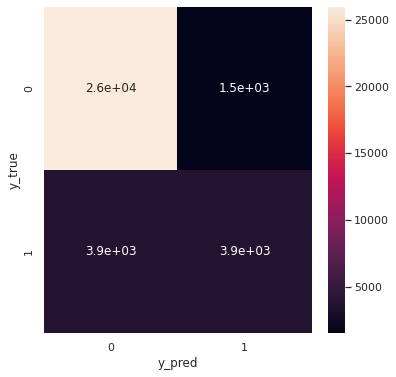

In [29]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=lr.predict(x_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [ ]:
#print(classification_report(y_test,y_pred)) #yukarda import edildi

#### LOOK AT ALL PREDICTION VALUE ON TEST DATA:

In [30]:
lr.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
lr.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[0.88409584, 0.11590416],
       [0.90985861, 0.09014139],
       [0.98882144, 0.01117856],
       [0.9156966 , 0.0843034 ],
       [0.89379653, 0.10620347],
       [0.89549387, 0.10450613],
       [0.67898742, 0.32101258],
       [0.71834348, 0.28165652],
       [0.94262168, 0.05737832],
       [0.98704626, 0.01295374]])

### E ) TUNING THE PREDICTION: WE can tune our prediction


In [32]:
y_probs = lr.predict_proba(x_test)[:,1]

In [33]:
y_pred = [1 if i>0.52 else 0 for i in y_probs]
y_pred[-10:]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
confusion_matrix(y_test,y_pred)

array([[26102,  1345],
       [ 4029,  3721]])

In [35]:
accuracy_score(y_test,y_pred)
l_score = accuracy_score(y_test,y_pred)

0.8473165326590334

* We can see, If we change our condition for probobilty,our prediction and confusion matrix and accuracy_score change

## 2)NAIVE BAYES METHOD
* In machine learning, Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. 
* Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.


### A ) Train-test splitting

In [36]:
y = df.RainTomorrow_label
x = df.drop('RainTomorrow_label',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of Naive B. Method

In [37]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [38]:
nb  #we can look at which option is there in GaussionNB

GaussianNB()

In [ ]:
#?nb

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [39]:
n_score=accuracy_score(y_test,y_pred)
n_score

0.7837315680313663

In [40]:
c_nb=confusion_matrix(y_test,y_pred)
c_nb
#confusion matrixle tahmin etme sayilarini bulduk,1 icin 32 i dogru tahmin,0 icin 30 i dogru tahmin
#En ustte import edildi.

array([[22467,  4980],
       [ 2632,  5118]])

#### HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap.

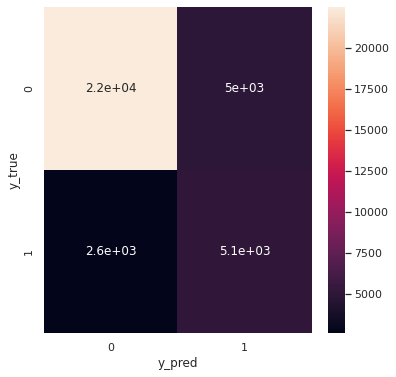

In [41]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=nb.predict(x_test)
cmnb=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmnb, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [ ]:
#print(classification_report(y_test,y_pred)) #yukarda import edildi

#### LOOK AT ALL PREDICTION VALUE ON TEST DATA.

In [42]:
nb.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [43]:
nb.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[9.96477069e-01, 3.52293091e-03],
       [9.97316050e-01, 2.68394986e-03],
       [1.00000000e+00, 8.43792409e-11],
       [9.99654758e-01, 3.45242279e-04],
       [5.95999683e-01, 4.04000317e-01],
       [9.87373519e-01, 1.26264814e-02],
       [9.72372436e-01, 2.76275635e-02],
       [1.45340565e-01, 8.54659435e-01],
       [9.99097726e-01, 9.02274198e-04],
       [9.99396722e-01, 6.03278426e-04]])

### E ) TUNING THE PREDICTION: WE can tune our prediction

In [44]:
y_probs = nb.predict_proba(x_test)[:,1]
y_pred = [1 if i>0.45 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [45]:
nb_tuned_bestscore=accuracy_score(y_test,y_pred)
nb_tuned_bestscore

0.7799244253771628

In [46]:

cmnb_best=confusion_matrix(y_test,y_pred) 
cmnb_best

array([[22248,  5199],
       [ 2547,  5203]])

* If we tune our data for nb, it increase a little.
* nb_tuned_bestscore= % 89 and cmnb_best are our best best score and our best confusion matrix

## 3)KNN METHOD
* In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. 
* A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 
* In this method we need to choose k value.It means that we chose k number of points of classes which are nearest to the out test point. We can call this small data set. We count the number of classes in the small dataset and determine the highest number of class. Finally we can say our test point belongs to the class.

* While choosing k number we have to be carefull because small k value causes overfitting while big k value causes underfitting.

* Coding is the same for all supervised classes and we jus need to change the last part of the code.
* K=1 SECERSEK OVERFITTING OLABILIR, K= BUYUK SECERSEK UNDERFITTING OLABILIR

In [47]:
from sklearn.neighbors import KNeighborsClassifier
y=df.RainTomorrow_label
x=df.drop("RainTomorrow_label",axis=1)


### A ) Train-test splitting

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of KNN Medhod

In [49]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
knn  ##we can look at which option is there in KNeighborsClassifier
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     #metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     #weights='uniform')

KNeighborsClassifier(n_neighbors=3)

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

#### Look at accuracy_score

In [51]:
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.8284796999744296

In [52]:
c_knn=confusion_matrix(y_test,y_pred)
c_knn

array([[25149,  2298],
       [ 3739,  4011]])

#### HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap.

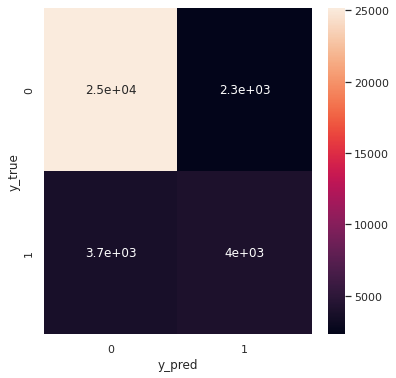

In [53]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=knn.predict(x_test)
cmknn=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmknn, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [ ]:
#print(classification_report(y_test,y_pred)) #yukarda import edildi

#### LOOK AT ALL PREDICTION VALUE ON TEST DATA.

In [54]:
knn.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
knn.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

### E ) TUNING THE PREDICTION: WE can tune our prediction
* we can tune (n_neigbors,metric,..)

In [56]:
RMSE = []   # ERROR ON TRAIN DATA

for k in range(30):
    k = k+1
    knn = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.22403521938431062
k = 3 için RMSE değeri:  0.2591751627818511
k = 4 için RMSE değeri:  0.27574490799549445
k = 5 için RMSE değeri:  0.28529779013476747
k = 6 için RMSE değeri:  0.2912205875395052
k = 7 için RMSE değeri:  0.29595353841573935
k = 8 için RMSE değeri:  0.299395294915722
k = 9 için RMSE değeri:  0.30199058052640515
k = 10 için RMSE değeri:  0.30395520702193246
k = 11 için RMSE değeri:  0.3055634450457578
k = 12 için RMSE değeri:  0.30704345575872216
k = 13 için RMSE değeri:  0.308255838358122
k = 14 için RMSE değeri:  0.30929310765027584
k = 15 için RMSE değeri:  0.3102385552951328
k = 16 için RMSE değeri:  0.3108902925408207
k = 17 için RMSE değeri:  0.31158758910308143
k = 18 için RMSE değeri:  0.3122707699394464
k = 19 için RMSE değeri:  0.3128338598007346
k = 20 için RMSE değeri:  0.3134000250756172
k = 21 için RMSE değeri:  0.3139117791948178
k = 22 için RMSE değeri:  0.31439814261177
k = 23 için RMSE değeri:  0.3

In [59]:
from sklearn.model_selection import GridSearchCV  
#We use Grid for tuning

In [60]:
knn_params = {'n_neighbors': np.arange(1,30,1)} #we obta
knn = KNeighborsRegressor()

In [61]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10) #cross validation yontemi kullaniliyor.nesnesi tanimlandi
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [62]:
print("Best Score:"+str(knn_cv_model.best_score_))
print("Best Parameters:"+str(knn_cv_model.best_params_))

Best Score:0.37156841859318207
Best Parameters:{'n_neighbors': 29}


* If we use n_neighbors=29, we can obtain best score...

In [65]:
knn_tuned =KNeighborsClassifier(n_neighbors = 29)
knn_tuned = knn_tuned.fit(x_train,y_train)
y_pred = knn_tuned.predict(x_test)
knn_tuned_score=accuracy_score(y_test,y_pred)
knn_tuned_score

0.8497883342330312

In [ ]:
#np.sqrt(mean_squared_error(y_test, knn_tuned.predict(x_test)))

* we tune the knn ,than our score increase.

In [66]:
knn_tune2 =KNeighborsClassifier(n_neighbors = 29,metric='hamming')
knn_tune2.fit(x_train,y_train)
y_pred = knn_tune2.predict(x_test)
knn_tuned_bestscore=accuracy_score(y_test,y_pred)
knn_tuned_bestscore

0.8126260760860301

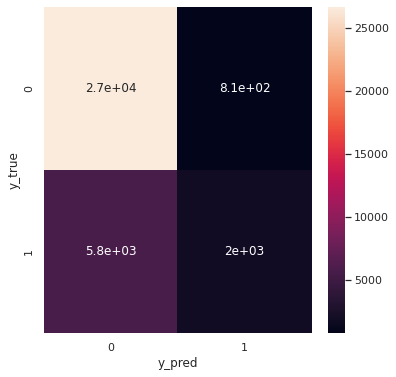

In [67]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=knn_tune2.predict(x_test)
cmknn_best=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmknn_best, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

* If we change metric and use tuned n-neigbors,acurracy_score is best..There are many kinds of metric in KNN. minkowski,hamming,.... 

### Conclusion KNN:
* knn_tuned_bestscore= % 85  and cmknn_best are our best best score and our best confusion matrix

## 4)SVM(SUPPORT VECTOR MACHINES)
* Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.
* SVM is used fo both regression and classification problems, but generally for classification. There is a C parameter inside the SVM algoritma and the default value of C parameter is 1. If C is small, it causes the misclassification. If C is big, it causes ovetfitting. So we need to try C parameter to find best value.
* SVM, hem regresyon hem de sınıflandırma problemleri için kullanılır, ancak genellikle sınıflandırma için kullanılır. SVM içerisinde C parametresi vardır ve C parametresinin default değeri 1'dir. C'nin küçük olması yanlış sınıflandırmaya neden olur. C büyükse overfitting e neden olur. Bu yüzden en iyi değeri bulmak için C parametresini denememiz gerekiyor.

In [70]:
from sklearn.svm import SVC
y=df.RainTomorrow_label
x=df.drop("RainTomorrow_label",axis=1)

### A ) Train-test splitting

In [71]:
y = df.RainTomorrow_label
x = df.drop('RainTomorrow_label',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

### B ) Modeling of SVM Medhod

In [72]:
svm = SVC(C=5,degree=9,kernel = 'poly')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [ ]:
#?svm

In [ ]:
svm
#SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    #decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    #max_iter=-1, probability=False, random_state=None, shrinking=True,
    #tol=0.001, verbose=False)

In [ ]:
y_pred

### C ) Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data

In [73]:
svm_score1 = accuracy_score(y_test,y_pred)
svm_score1

0.8452140807455181

In [ ]:
c_svm=confusion_matrix(y_test,y_pred)
c_svm

#### HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap.

In [ ]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=svm.predict(x_test)
cmsvm=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmsvm, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### CLASSICICATION REPORT: we can also see classification report.

In [ ]:
#print(classification_report(y_test,y_pred)) #yukarda import edildi

### E ) TUNING THE PREDICTION: WE can tune our prediction
* Look at c,kernel,gamma

#### Tuning1-change C and gamma

In [ ]:
#EN UYGUN C VE GAMMA DEGERI BULMA
svc_params ={"C":[0.00001,0.001,0.01,5,10,50,100],
            "gamma":[0.0001,0.001,0.01,1,5,10,50,100]}
svc =SVC()
svc_cv_model = GridSearchCV(svc,svc_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
svc_cv_model.fit(x_train,y_train)
print("Best Parameters:"+str(svc_cv_model.best_params_))

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
#?svc_cv_model

In [ ]:
# svm_tune1= SVC(C=100,gamma= 0.0001,degree=9,kernel = 'poly')
# svm_tune1.fit(x_train,y_train)
# y_pred = svm.predict(x_test)  # cok uzun suruyor

In [ ]:
svm_score2 = accuracy_score(y_test,y_pred)
print(svm_score1)
print(svm_score2)

#### Tuning2-changing kernel=linear,c=100

In [ ]:
#we changed the kernel,We can use linear,poly,rbf...
svm_tune2 = SVC(C=100,degree=9,kernel = 'linear')
svm_tune2.fit(x_train,y_train)
y_pred = svm_tune2.predict(x_test)
accuracy_score(y_test,y_pred)

Tuning3-changing kernel=rbf,c=100

In [ ]:
#we changed the kernel,We can use linear,poly,rbf...
svm_tune3 = SVC(C=100,degree=9,kernel = 'rbf')
svm_tune3.fit(x_train,y_train)
y_pred = svm_tune3.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
# svc_tuned=SVC(C=100,gamma=0.0001,kernel = 'linear')
# svc_tuned.fit(x_train,y_train)
# y_pred = svc_tuned.predict(x_test)
# accuracy_score(y_test,y_pred)    #uzun suruyor

### Conclusion:

* svm_score1=84 is the best score and c_svm is the best confusion matrix

## LETS SEE ALL SCORE OF CLASSIFICATIONS METHODS 

In [ ]:
indexx = ["Log","KNN","SVM","NB"]
regressions = [l_score,knn_tuned_score,svm_score1,n_score]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);

## FINISH